In [1]:
# Face Emotions recognition using CNN
# import libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization,Activation,GlobalMaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
import random
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from sklearn import metrics

In [2]:
# config
img_height = 48
img_width = 48
batch_size  = 128

In [3]:
# load dataset
train_data_directory = 'data/emotion_data/train/'
validation_data_directory = 'data/emotion_data/test/'

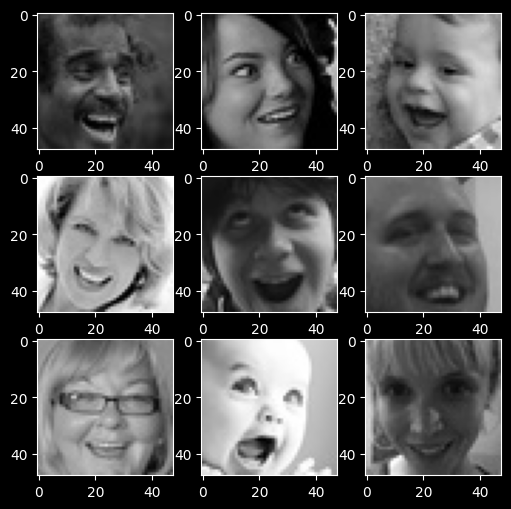

In [4]:
# visualize images
def plot_exp(expression):
    plt.style.use('dark_background')
    plt.figure(figsize= (6,6))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i)
        img = load_img(train_data_directory + expression+"/"+
                  os.listdir(train_data_directory + expression)[i], target_size=(img_width,img_height))
        plt.imshow(img)
    plt.show()

plot_exp('happy')

In [5]:
# build data generator
train_data_gen  = ImageDataGenerator()
validation_data_gen = ImageDataGenerator()

train_set = train_data_gen.flow_from_directory(train_data_directory,target_size = (img_width,img_height),color_mode = "grayscale", batch_size=batch_size, class_mode='categorical', shuffle=True)
test_set = validation_data_gen.flow_from_directory(validation_data_directory, target_size = (img_width,img_height), color_mode = "grayscale", batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Natural', 'Sad', 'Surprise']
img, label = train_set.__next__()
print(img.shape)

(128, 48, 48, 1)


In [7]:
# CNN Model
model_1 = Sequential()

#1st layer
model_1.add(Conv2D(64,(3,3),padding = 'same',input_shape = (img_width,img_height,1)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.25))

#2nd layer
model_1.add(Conv2D(128,(5,5),padding = 'same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout (0.25))

#3rd layer
model_1.add(Conv2D(512,(3,3),padding = 'same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout (0.25))

#4th layer
model_1.add(Conv2D(512,(3,3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())

#Fully connected 1st layer
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Fully connected layer 2nd layer
model_1.add(Dense(512))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

model_1.add(Dense(7, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 24, 24, 128)       0         
                                                        

In [8]:
# compile the model
checkpoint = ModelCheckpoint("./models/FER_CNN_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0, patience=3, verbose=1, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=3, verbose=1, min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

model_1.compile(optimizer = Adam(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\D.azad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
# train the model
history_1 = model_1.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size,epochs=60,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)

C:\Users\D.azad\AppData\Local\Temp\ipykernel_24816\3326644461.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1 = model_1.fit_generator(generator=train_set, steps_per_epoch=train_set.n//train_set.batch_size,epochs=60,validation_data = test_set,validation_steps = test_set.n//test_set.batch_size,callbacks=callbacks_list)


Epoch 1/60
224/224 [==============================] - 27s 92ms/step - loss: 1.9570 - accuracy: 0.2089 - val_loss: 2.0151 - val_accuracy: 0.1469 - lr: 0.0010
Epoch 2/60
224/224 [==============================] - 10s 43ms/step - loss: 1.8517 - accuracy: 0.2282 - val_loss: 1.9520 - val_accuracy: 0.1542 - lr: 0.0010
Epoch 3/60
224/224 [==============================] - 9s 42ms/step - loss: 1.6344 - accuracy: 0.3487 - val_loss: 1.7482 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 4/60
224/224 [==============================] - 9s 42ms/step - loss: 1.4216 - accuracy: 0.4531 - val_loss: 1.4485 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 5/60
224/224 [==============================] - 10s 43ms/step - loss: 1.3146 - accuracy: 0.4937 - val_loss: 1.2622 - val_accuracy: 0.5338 - lr: 0.0010
Epoch 6/60
224/224 [==============================] - 10s 42ms/step - loss: 1.2456 - accuracy: 0.5248 - val_loss: 1.1935 - val_accuracy: 0.5409 - lr: 0.0010
Epoch 7/60
224/224 [==============================] - 9s 42m

In [10]:
# prediction & evaluation
results = model_1.evaluate(test_set)
preds   = model_1.predict(test_set)
print(' Model accuracy {}%'.format(round(results[1]*100,2)))

57/57 [==============================] - 2s 30ms/step
 Model accuracy 62.04%


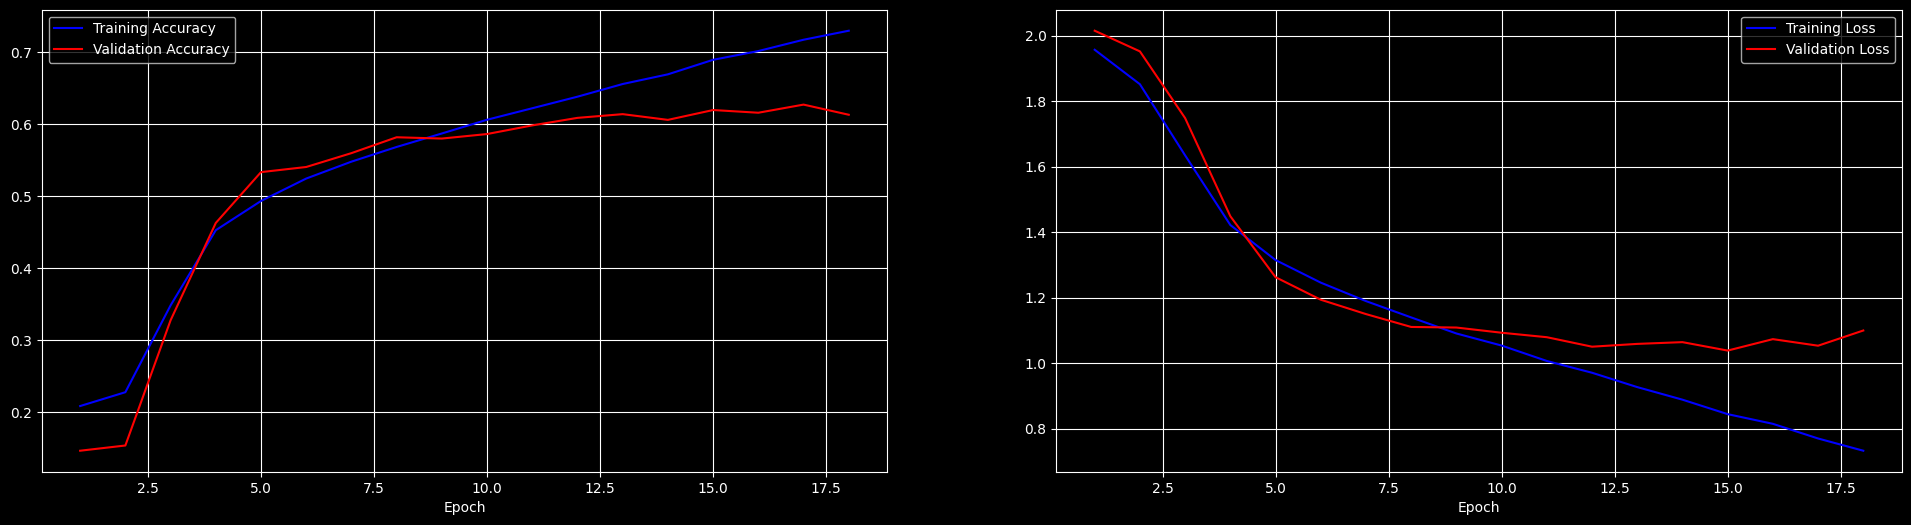

In [11]:
# visualise training and testing accuracy & loss
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

plot_results(history_1)

In [12]:
# saving model
model_1.save("./models/FER_CNN_model.h5")

In [13]:
#Test the model
my_model = load_model('./models/FER_CNN_model.h5', compile=False)
test_img, test_lbl = test_set.__next__()
predictions=my_model.predict(test_img)
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

4/4 [==============================] - 1s 3ms/step
Accuracy =  0.5703125


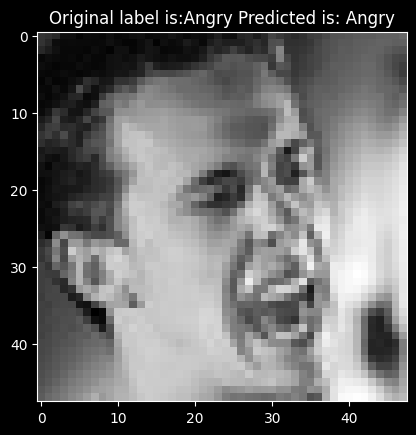

In [14]:
# prediction on random images
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()